In [1]:
import os
import re
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
def extract_fitness_values(line):
    value_strings = line[line.find('[') + 1:line.find(']')].split()
    return tuple(float(s) for s in value_strings)

In [3]:
def parse_front_fitnesses_to_frame(path):
    lines = !grep "\[" {path}
    fitness_values = [extract_fitness_values(line) for line in lines]
    frame = pd.DataFrame.from_records(fitness_values, columns=('map', 'epc'))
    return frame

In [4]:
def keep_non_dominated(frame):
    m = frame.as_matrix()[:, :2]
    non_dominated = []
    for i, row in enumerate(m):
        is_dominated = any(all(r) for j, r in enumerate(m > row) if i != j)
        non_dominated.append(not is_dominated)
    return frame[non_dominated]

In [5]:
def extract_frame_for_dir(d, fold, runs=5):
    frames = []
    for run in range(runs):
        fitnesses_file = os.path.join(d, f'best_ind_binaries/front-u{fold}-run{run}/front_fitnesses.log')
        frame = parse_front_fitnesses_to_frame(fitnesses_file)
        frames.append(frame)

    combined_frame = pd.concat(frames)
    combined_frame['eild'] = 0.
    return keep_non_dominated(combined_frame)

In [6]:
era_out_dir = '../era-outs/20171110-spea-ml-1m-out/'
new_run_dir = '../era-outs/20171111-spea-ml-1m-out/'
fold = 1

old_frame = extract_frame_for_dir(era_out_dir, fold, runs=1)
new_frame = extract_frame_for_dir(new_run_dir, fold)

ValueError: could not convert string to float: 'grep:'

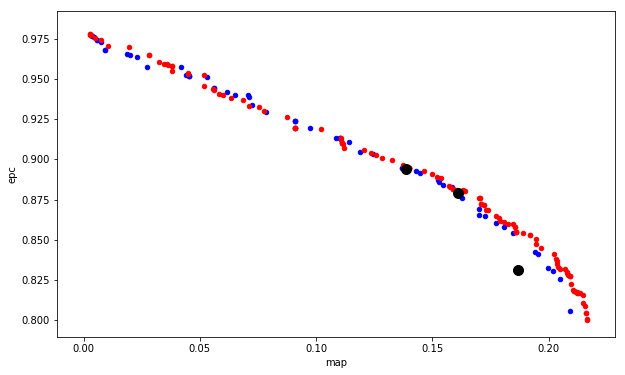

In [114]:
ax = old_frame.plot.scatter('map', 'epc', c='b')
new_frame.plot.scatter('map', 'epc', c='r', ax=ax)

points = [
    [0.1866674313404046, 0.8313676836898889], # 70-30
    [0.16095816114032907, 0.8789270324382222], # 60-40
    [0.13868646946691476, 0.894214316014145], # 50-50
]

x, y = zip(*points)

ax.scatter(x=x, y=y, c='black', s=100) 

In [12]:
era_out_dir = '../era-outs/jesters/20171113-spea-jester-out/'
fold = 1

combined_frame = extract_frame_for_dir(era_out_dir, fold)

In [13]:
combined_frame.to_csv('combined_front.csv')
frame = combined_frame

In [11]:
fitnesses_file = '../era-outs/subsets-ml-1m-u1-2017-12-12-15h24m21s/best-3/best_ind_binaries/front-u1-run0/front_fitnesses.log'
#fitnesses_file = '../../ERA/yelp-out/best_ind_binaries/front-u1-run0/front_fitnesses.log'
frame = parse_front_fitnesses_to_frame(fitnesses_file)
frame.to_csv('front.csv')

In [19]:
!mkdir subset-plots
for i in range(2, 15):
    plot_name = f'best-{i}'
    fitnesses_file = f'../era-outs/subsets-ml-1m-u1-2017-12-12-15h24m21s/{plot_name}/best_ind_binaries/front-u1-run0/front_fitnesses.log'
    #fitnesses_file = '../../ERA/yelp-out/best_ind_binaries/front-u1-run0/front_fitnesses.log'
    frame = parse_front_fitnesses_to_frame(fitnesses_file)
    frame.plot.scatter('map', 'epc')
    plt.savefig(f'subset-plots/{plot_name}.png')
    plt.clf()

mkdir: cannot create directory ‘subset-plots’: File exists


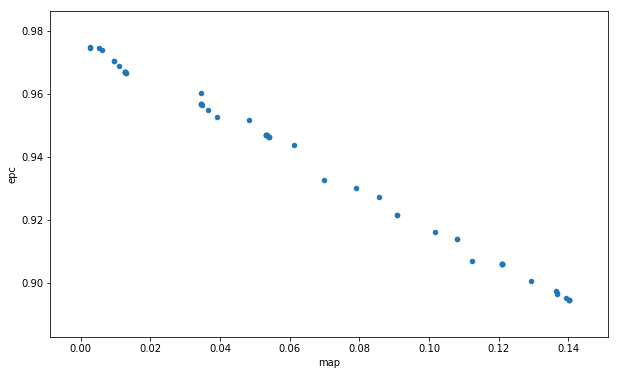

In [12]:
frame.plot.scatter('map', 'epc')

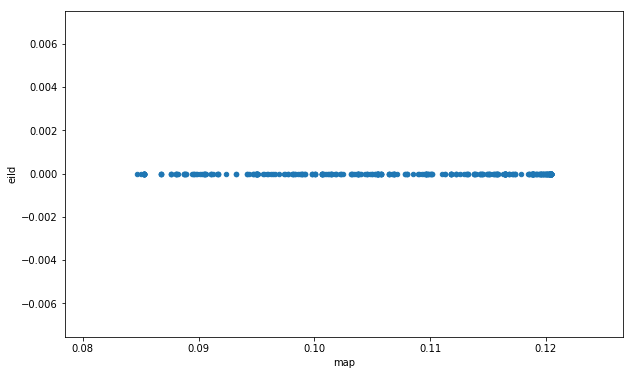

In [27]:
frame.plot.scatter('map', 'eild')

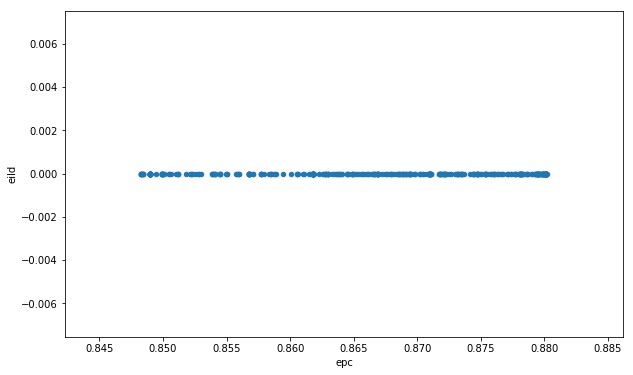

In [28]:
frame.plot.scatter('epc', 'eild')

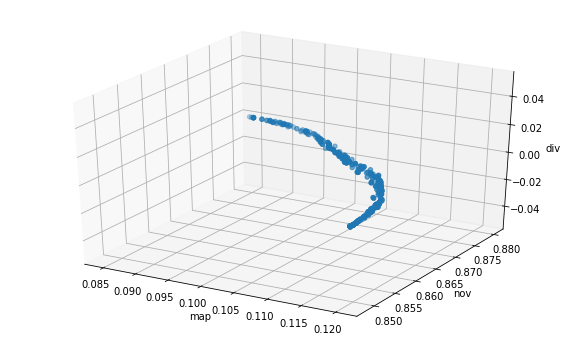

In [29]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(frame.map, frame.epc, frame.eild)
threedee.set_xlabel('map')
threedee.set_ylabel('nov')
threedee.set_zlabel('div')
plt.savefig('3d_front.png')